## **Project Report: Stock Price Prediction Using LSTM Networks**
Submited By-

Pratyaksh Chauhan(055031)

Himanshu Aggarwal(055013)

## **Problem Statement**


Stock market prediction is inherently challenging due to the volatile and non-linear nature of financial data. Traditional statistical methods often fail to account for sequential dependencies and long-term trends, resulting in suboptimal forecasting accuracy.
This project addresses these challenges by employing Long Short-Term Memory (LSTM) networks, a specialized form of Recurrent Neural Networks (RNNs), to predict stock prices. By leveraging historical data patterns and modeling sequential dependencies, LSTM enhances forecasting accuracy.
The focus is on predicting stock prices for NIFTY 50 and MRF, two critical indicators in India's financial market. The implementation includes data preprocessing, LSTM model development, training, and evaluation to assess the effectiveness of deep learning techniques in financial forecasting.
## **Abstract**
The project implements an LSTM-based neural network for stock price prediction using historical data from Yahoo Finance (yfinance). LSTM networks are particularly suited for time-series forecasting due to their ability to retain long-term dependencies and address the vanishing gradient problem.
The dataset includes stock prices for NIFTY 50 and MRF, which are preprocessed, normalized, and transformed into a supervised learning format. The LSTM model is trained on this data to identify patterns and predict future prices.
Model performance is evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics, with predictions visualized alongside actual stock prices. The results demonstrate the potential of deep learning models in financial forecasting, providing valuable insights for investors, traders, and analysts.
## **Project Structure**
Importing Libraries


Data Analysis


Model Development


Training the Model


Performance Evaluation
## **Managerial Insights**
Each section provides a comprehensive understanding of how deep learning techniques can be applied to financial market predictions.
Importing Libraries


The following Python libraries were used:


**Data Handling & Processing:** numpy, pandas


**Data Visualization:** matplotlib.pyplot, seaborn


**Stock Data Retrieval:** yfinance


**Deep Learning Framework:** tensorflow.keras (including Sequential, LSTM, Dense, Dropout)


**Performance Metrics:** mean_squared_error, mean_absolute_error


These libraries enable efficient data preprocessing, model development, training, and evaluation.
Data Analysis
1. ****Preparing the Dataset****

    * Stock price data was retrieved from Yahoo Finance (yfinance).
    * Missing values were handled appropriately using interpolation techniques.
    * Data normalization was performed using MinMaxScaler, scaling values between 0 and 1 to improve training efficiency.
    * The dataset was split into training (80%) and testing (20%) sets for model evaluation purposes.
    * The data was reshaped into a 3D format (samples, time steps, features) suitable for LSTM input.

2. **Exploratory Data Analysis(EDA)**
    * Historical trends in stock prices were visualized using line plots to understand fluctuations over time.
    * Correlation analysis was performed to identify relationships between features such as Open, High, Low, Close, and Volume.

## **Model Development**
1. **Architecture Design**

    * Multiple LSTM layers to capture sequential dependencies in stock prices.
    * Dropout layers to prevent overfitting during training.
    * Dense layers for output generation with linear activation functions for continuous predictions.


2. **Optimization Strategy**
    * The model was compiled using the Adam optimizer for efficient weight updates.
    * The loss function used was Mean Squared Error (MSE) to minimize prediction errors.


## **Training the Model**
1. **Model Fitting Process**-
Training was conducted over multiple epochs with a batch size optimized for computational efficiency.
Training loss and validation loss were monitored throughout to detect overfitting or underfitting issues.
A callback mechanism was implemented to adjust learning rates dynamically based on performance trends.
2. **Data Augmentation Techniques**-
To improve generalization, techniques such as random sampling of time intervals were applied during training.


## **Performance Evaluation**
1. **Metrics Used**-
Mean Squared Error (MSE) and Mean Absolute Error (MAE) were calculated to quantify prediction accuracy.
Root Mean Squared Error (RMSE) provided insights into overall model performance.
2. **Visualization of Results**-
Predicted stock prices were plotted against actual values for both NIFTY 50 and MRF.
Graphs revealed that the model captured overall trends effectively but struggled with extreme price movements.


## **Managerial Insights**
1. **Enhanced Decision-Making Capabilities:**
The LSTM model provides predictive insights into stock price movements, enabling informed investment decisions.
2. **Risk Management:**
While effective at capturing trends, the model's limitations in handling sudden market fluctuations highlight the need for complementary analysis tools like sentiment analysis or macroeconomic indicators.
3. **Automation Potential:**
Financial institutions can integrate LSTM models into algorithmic trading systems for real-time decision-making.
4. **Portfolio Optimization:**
Investors can use predictions to identify long-term opportunities while balancing risks across their portfolios.
5. **Future Improvements:**
Incorporating hybrid models combining LSTM with reinforcement learning or external factors like news sentiment could enhance predictive accuracy.
Expanding datasets with macroeconomic indicators may improve model robustness across diverse market conditions.

## Importing the data

In [ ]:
!pip install yfinance

In [ ]:

import yfinance as yf
import pandas as pd

# Downloading the entire available historical data for NIFTY 50
ha13_nifty50 = yf.download("^NSEI", start="2007-09-17", end = "2025-03-25")
print("NIFTY 50 Data:")
ha13_nifty50.head()



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

NIFTY 50 Data:


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [ ]:

# Downloading the entire available historical data for MRF
ha13_MRF = yf.download("MRF.NS", start="2007-09-17", end = "2025-03-25")
print("\nMRF Data:")
ha13_MRF.head()


[*********************100%***********************]  1 of 1 completed


MRF Data:


Price,Close,High,Low,Open,Volume
Ticker,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
Date,,,,,
2007-09-17,3594.755859,3656.282552,3584.684329,3656.282552,510
2007-09-18,3611.223633,3636.951215,3587.548439,3627.500343,393
2007-09-19,3632.560303,3675.376141,3620.961482,3655.328635,11693
2007-09-20,3654.134766,3665.829142,3627.643422,3656.282712,695
2007-09-21,3624.589355,3637.190599,3603.778087,3632.417383,1096


In [ ]:

ha13_MRF.to_csv('MRF.csv')
ha13_nifty50.to_csv('nifty50.csv')

## Preprocessing

In [ ]:
# Make a copy of the original data
ha13_nifty50_cleaned = ha13_nifty50.copy()

# Removing the multi-level column names and ticker names
ha13_nifty50_cleaned.columns = [col[0] for col in ha13_nifty50_cleaned.columns]
ha13_nifty50_cleaned = ha13_nifty50_cleaned['Close']
ha13_nifty50_cleaned.index = pd.to_datetime(ha13_nifty50_cleaned.index)

# Displaying cleaned column names
ha13_nifty50_cleaned.head()

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [ ]:
# Make a copy of the original MRF data
ha13_MRF_cleaned = ha13_MRF.copy()
ha13_MRF_cleaned.columns = [col[0] for col in ha13_MRF_cleaned.columns]
ha13_MRF_cleaned = ha13_MRF_cleaned['Close']
ha13_MRF_cleaned.index = pd.to_datetime(ha13_MRF_cleaned.index)
ha13_MRF_cleaned.head()


,Close
Date,
2007-09-17,3594.755859
2007-09-18,3611.223633
2007-09-19,3632.560303
2007-09-20,3654.134766
2007-09-21,3624.589355


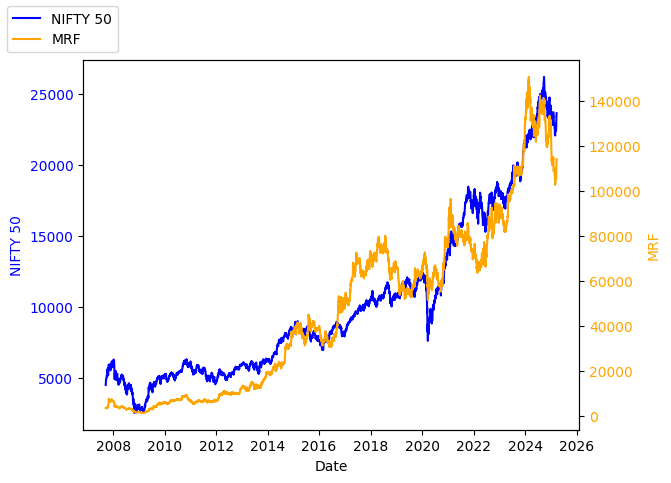

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object for the primary axis
fig, ax1 = plt.subplots()

# Plot NIFTY 50 data on the primary axis
ax1.plot(ha13_nifty50_cleaned.index, ha13_nifty50_cleaned, label='NIFTY 50', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('NIFTY 50', color='b')
ax1.tick_params('y', labelcolor='b')

# Create a secondary axis object that shares the x-axis with the primary axis
ax2 = ax1.twinx()

# Plot MRF data on the secondary axis
ax2.plot(ha13_MRF_cleaned.index, ha13_MRF_cleaned, label='MRF', color='orange')
ax2.set_ylabel('MRF', color='orange')
ax2.tick_params('y', labelcolor='orange')

# Add a legend
fig.legend(loc='upper left')

# Display the plot
plt.show()

In [ ]:

import numpy as np
import datetime
import pandas as pd

def ha13_str_to_datetime(ha13_s):
    ha13_split = ha13_s.split('-')
    ha13_year, ha13_month, ha13_day = int(ha13_split[0]), int(ha13_split[1]), int(ha13_split[2])
    return datetime.datetime(year=ha13_year, month=ha13_month, day=ha13_day)

def ha13_df_to_windowed_df(ha13_dataframe, ha13_first_date_str, ha13_last_date_str, ha13_n=3):
    ha13_first_date = ha13_str_to_datetime(ha13_first_date_str)
    ha13_last_date = ha13_str_to_datetime(ha13_last_date_str)

    ha13_dates = []
    ha13_X, ha13_Y = [], []

    ha13_current_date = ha13_first_date

    while ha13_current_date <= ha13_last_date:
        ha13_window = []
        ha13_temp_date = ha13_current_date

        # Find the values for the previous n valid trading days
        for i in range(ha13_n):
            ha13_temp_date -= datetime.timedelta(days=1)
            while ha13_temp_date >= ha13_dataframe.index[0]:
                ha13_temp_date_dt = pd.to_datetime(ha13_temp_date)
                if ha13_temp_date_dt in pd.to_datetime(ha13_dataframe.index):
                    ha13_window.insert(0, ha13_dataframe.loc[ha13_temp_date_dt])
                    break
                ha13_temp_date -= datetime.timedelta(days=1)
            else: #break out if we are out of dates.
                break

        # Check if we have enough data for the window
        if len(ha13_window) == ha13_n and pd.to_datetime(ha13_current_date) in pd.to_datetime(ha13_dataframe.index):
            ha13_X.append(ha13_window)
            ha13_Y.append(ha13_dataframe.loc[pd.to_datetime(ha13_current_date)])
            ha13_dates.append(ha13_current_date)

        ha13_current_date += datetime.timedelta(days=1)

    ha13_ret_df = pd.DataFrame({})
    ha13_ret_df['Target Date'] = ha13_dates

    ha13_X = np.array(ha13_X)
    for ha13_i in range(0, ha13_n):
        ha13_ret_df[f'Target-{ha13_n-ha13_i}'] = ha13_X[:, ha13_i]

    ha13_ret_df['Target'] = ha13_Y

    return ha13_ret_df

In [ ]:
# Start day second time around: '2021-03-25'
ha13_nifty50_df = ha13_df_to_windowed_df(ha13_nifty50_cleaned,
                                '2007-09-20',
                                '2025-03-24',3)
ha13_nifty50_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2007-09-20,4494.649902,4546.200195,4732.350098,4747.549805
1,2007-09-21,4546.200195,4732.350098,4747.549805,4837.549805
2,2007-09-24,4732.350098,4747.549805,4837.549805,4932.200195
3,2007-09-25,4747.549805,4837.549805,4932.200195,4938.850098
4,2007-09-26,4837.549805,4932.200195,4938.850098,4940.500000
...,...,...,...,...,...
4287,2025-03-18,22470.500000,22397.199219,22508.750000,22834.300781
4288,2025-03-19,22397.199219,22508.750000,22834.300781,22907.599609
4289,2025-03-20,22508.750000,22834.300781,22907.599609,23190.650391
4290,2025-03-21,22834.300781,22907.599609,23190.650391,23350.400391


In [ ]:
ha13_MRF_df = ha13_df_to_windowed_df(ha13_MRF_cleaned,
                                '2007-09-20',
                                '2025-03-25',
                                3)
ha13_MRF_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2007-09-20,3594.755859,3611.223633,3632.560303,3654.134766
1,2007-09-21,3611.223633,3632.560303,3654.134766,3624.589355
2,2007-09-24,3632.560303,3654.134766,3624.589355,3589.983398
3,2007-09-25,3654.134766,3624.589355,3589.983398,3581.820801
4,2007-09-26,3624.589355,3589.983398,3581.820801,3575.186035
...,...,...,...,...,...
4311,2025-03-18,107264.250000,105041.601562,105410.796875,105410.796875
4312,2025-03-19,105041.601562,105410.796875,105410.796875,109922.796875
4313,2025-03-20,105410.796875,105410.796875,109922.796875,111107.898438
4314,2025-03-21,105410.796875,109922.796875,111107.898438,112050.148438


In [ ]:

ha13_nifty50_df.to_csv('nifty50_windowed_df.csv')
ha13_MRF_df.to_csv('MRF_windowed_df.csv')


In [ ]:


import pandas as pd
ha13_nifty50_df = pd.read_csv('nifty50_windowed_df.csv')
ha13_MRF_df = pd.read_csv('MRF_windowed_df.csv')


In [ ]:

import numpy as np

def ha13_windowed_df_to_date_X_y(ha13_windowed_dataframe):
    ha13_df_as_np = ha13_windowed_dataframe.to_numpy()

    ha13_dates = ha13_df_as_np[:, 0]

    ha13_middle_matrix = ha13_df_as_np[:, 1:-1]
    ha13_X = ha13_middle_matrix.reshape((len(ha13_dates), ha13_middle_matrix.shape[1], 1))

    ha13_Y = ha13_df_as_np[:, -1]

    return ha13_dates, ha13_X.astype(np.float32), ha13_Y.astype(np.float32)

In [ ]:

# Nifty 50
ha13_dates_nifty, ha13_X_nifty, ha13_y_nifty = ha13_windowed_df_to_date_X_y(ha13_nifty50_df)

ha13_dates_nifty.shape, ha13_X_nifty.shape, ha13_y_nifty.shape

((4292,), (4292, 3, 1), (4292,))

In [ ]:

# MRF
ha13_dates_MRF, ha13_X_MRF, ha13_y_MRF = ha13_windowed_df_to_date_X_y(ha13_MRF_df)

ha13_dates_MRF.shape, ha13_X_MRF.shape, ha13_y_MRF.shape

((4316,), (4316, 3, 1), (4316,))

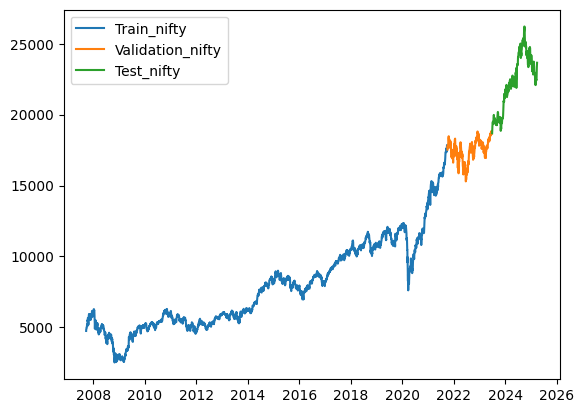

In [ ]:
import matplotlib.pyplot as plt

ha13_q_80_nifty = int(len(ha13_dates_nifty) * .8)
ha13_q_90_nifty = int(len(ha13_dates_nifty) * .9)

ha13_dates_train_nifty, ha13_X_train_nifty, ha13_y_train_nifty = ha13_dates_nifty[:ha13_q_80_nifty], ha13_X_nifty[:ha13_q_80_nifty], ha13_y_nifty[:ha13_q_80_nifty]

ha13_dates_val_nifty, ha13_X_val_nifty, ha13_y_val_nifty = ha13_dates_nifty[ha13_q_80_nifty:ha13_q_90_nifty], ha13_X_nifty[ha13_q_80_nifty:ha13_q_90_nifty], ha13_y_nifty[ha13_q_80_nifty:ha13_q_90_nifty]
ha13_dates_test_nifty, ha13_X_test_nifty, ha13_y_test_nifty = ha13_dates_nifty[ha13_q_90_nifty:], ha13_X_nifty[ha13_q_90_nifty:], ha13_y_nifty[ha13_q_90_nifty:]

plt.plot(ha13_dates_train_nifty, ha13_y_train_nifty)
plt.plot(ha13_dates_val_nifty, ha13_y_val_nifty)
plt.plot(ha13_dates_test_nifty, ha13_y_test_nifty)

plt.legend(['Train_nifty', 'Validation_nifty', 'Test_nifty'])

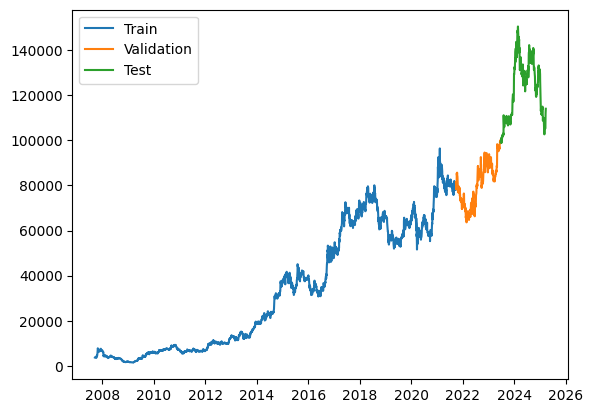

In [ ]:

ha13_q_80_MRF = int(len(ha13_dates_MRF) * .8)
ha13_q_90_MRF = int(len(ha13_dates_MRF) * .9)

ha13_dates_train_MRF, ha13_X_train_MRF, ha13_y_train_MRF = ha13_dates_MRF[:ha13_q_80_MRF], ha13_X_MRF[:ha13_q_80_MRF], ha13_y_MRF[:ha13_q_80_MRF]

ha13_dates_val_MRF, ha13_X_val_MRF, ha13_y_val_MRF = ha13_dates_MRF[ha13_q_80_MRF:ha13_q_90_MRF], ha13_X_MRF[ha13_q_80_MRF:ha13_q_90_MRF], ha13_y_MRF[ha13_q_80_MRF:ha13_q_90_MRF]
ha13_dates_test_MRF, ha13_X_test_MRF, ha13_y_test_MRF = ha13_dates_MRF[ha13_q_90_MRF:], ha13_X_MRF[ha13_q_90_MRF:], ha13_y_MRF[ha13_q_90_MRF:]

plt.plot(ha13_dates_train_MRF, ha13_y_train_MRF)
plt.plot(ha13_dates_val_MRF, ha13_y_val_MRF)
plt.plot(ha13_dates_test_MRF, ha13_y_test_MRF)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:


!pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object for Nifty
ha13_scaler_nifty = MinMaxScaler()

# Reshape the data for scaling (if necessary)
ha13_X_train_nifty_reshaped = ha13_X_train_nifty.reshape(-1, 1)
ha13_y_train_nifty_reshaped = ha13_y_train_nifty.reshape(-1, 1)

# Fit the scaler to the training data and transform it
ha13_X_train_nifty_scaled = ha13_scaler_nifty.fit_transform(ha13_X_train_nifty_reshaped).reshape(ha13_X_train_nifty.shape)
ha13_y_train_nifty_scaled = ha13_scaler_nifty.fit_transform(ha13_y_train_nifty_reshaped).reshape(ha13_y_train_nifty.shape)


# Scale validation and testing data using the fitted scaler
ha13_X_val_nifty_scaled = ha13_scaler_nifty.transform(ha13_X_val_nifty.reshape(-1, 1)).reshape(ha13_X_val_nifty.shape)
ha13_y_val_nifty_scaled = ha13_scaler_nifty.transform(ha13_y_val_nifty.reshape(-1, 1)).reshape(ha13_y_val_nifty.shape)

ha13_X_test_nifty_scaled = ha13_scaler_nifty.transform(ha13_X_test_nifty.reshape(-1, 1)).reshape(ha13_X_test_nifty.shape)
ha13_y_test_nifty_scaled = ha13_scaler_nifty.transform(ha13_y_test_nifty.reshape(-1, 1)).reshape(ha13_y_test_nifty.shape)

In [ ]:
# Model for Nifty
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

ha13_model_nifty = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(128, return_sequences=True),  # Increased units, return sequences for stacked LSTM
    layers.LSTM(64),  # Added another LSTM layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),  # Added dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

ha13_model_nifty.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

ha13_model_nifty.fit(ha13_X_train_nifty_scaled, ha13_y_train_nifty_scaled,
                    validation_data=(ha13_X_val_nifty_scaled, ha13_y_val_nifty_scaled),
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0522 - mean_absolute_error: 0.1570 - val_loss: 3.0575e-04 - val_mean_absolute_error: 0.0138 - learning_rate: 0.0010
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0027 - mean_absolute_error: 0.0341 - val_loss: 0.0011 - val_mean_absolute_error: 0.0304 - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - mean_absolute_error: 0.0273 - val_loss: 6.2662e-04 - val_mean_absolute_error: 0.0209 - learning_rate: 0.0010
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0240 - val_loss: 0.0081 - val_mean_absolute_error: 0.0889 - learning_rate: 0.0010
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.2008e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0060 - val_mean_absolute_error: 0.0762 - learning_rate: 0.0010
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8205e-04 - mean_absolute_error: 0.0184 - val

In [ ]:
# Model for MRF
ha13_model_MRF = Sequential([layers.Input((3, 1)),
                          layers.LSTM(64),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)])

ha13_model_MRF.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

ha13_model_MRF.fit(ha13_X_train_MRF, ha13_y_train_MRF, validation_data=(ha13_X_val_MRF, ha13_y_val_MRF), epochs=100)


Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1860864000.0000 - mean_absolute_error: 33479.1523 - val_loss: 6624245760.0000 - val_mean_absolute_error: 80840.4531
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1848450176.0000 - mean_absolute_error: 33297.2031 - val_loss: 6596618752.0000 - val_mean_absolute_error: 80669.3984
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1838745088.0000 - mean_absolute_error: 33134.8320 - val_loss: 6510540800.0000 - val_mean_absolute_error: 80134.1016
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1816080000.0000 - mean_absolute_error: 32572.2598 - val_loss: 6339476992.0000 - val_mean_absolute_error: 79059.5391
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1684376832.0000 - mean_absolute_error: 30878.2734 - val_loss: 6068134400.0000 - val_mean_absolute_error: 77324.4375
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1573766912.0000 - mean_absolute_error: 29214.7734 - v

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


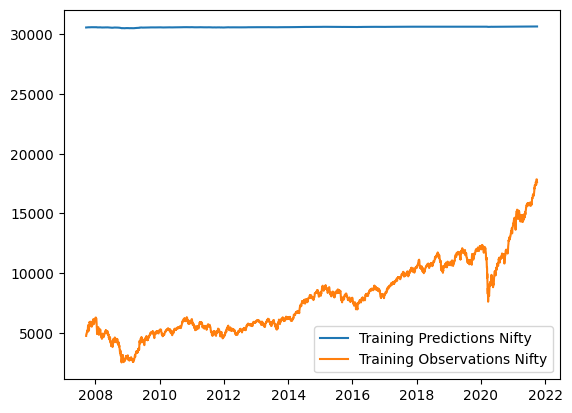

In [ ]:

# For Nifty
ha13_train_predictions_nifty = ha13_model_nifty.predict(ha13_X_train_nifty).flatten()

# Reshape to 2D for inverse_transform
ha13_train_predictions_nifty_2d = ha13_train_predictions_nifty.reshape(-1, 1)

# Inverse transform
ha13_train_predictions_nifty_original = ha13_scaler_nifty.inverse_transform(ha13_train_predictions_nifty_2d)

# Reshape back to 1D for plotting (if necessary)
ha13_train_predictions_nifty_original = ha13_train_predictions_nifty_original.flatten()

plt.plot(ha13_dates_train_nifty, ha13_train_predictions_nifty_original)
plt.plot(ha13_dates_train_nifty, ha13_y_train_nifty)
plt.legend(['Training Predictions Nifty', 'Training Observations Nifty'])


In [ ]:

ha13_train_predictions_nifty.min()

np.float32(1.8245976)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


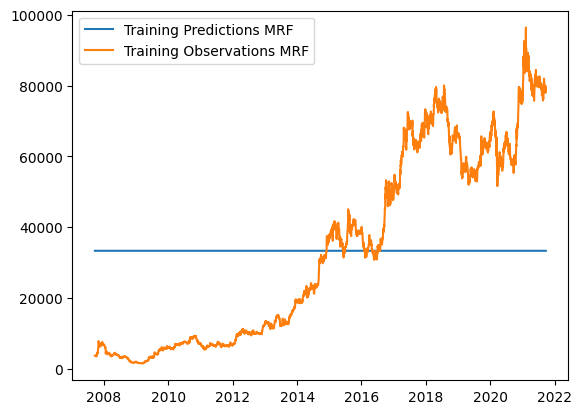

In [ ]:
# For MRF
ha13_train_predictions_MRF = ha13_model_MRF.predict(ha13_X_train_MRF).flatten()

plt.plot(ha13_dates_train_MRF, ha13_train_predictions_MRF)
plt.plot(ha13_dates_train_MRF, ha13_y_train_MRF)
plt.legend(['Training Predictions MRF', 'Training Observations MRF'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


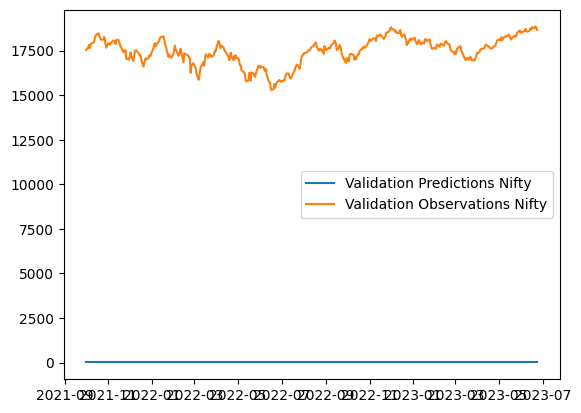

In [ ]:

# For Nifty
ha13_val_predictions_nifty = ha13_model_nifty.predict(ha13_X_val_nifty).flatten()

plt.plot(ha13_dates_val_nifty, ha13_val_predictions_nifty)
plt.plot(ha13_dates_val_nifty, ha13_y_val_nifty)
plt.legend(['Validation Predictions Nifty', 'Validation Observations Nifty'])


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


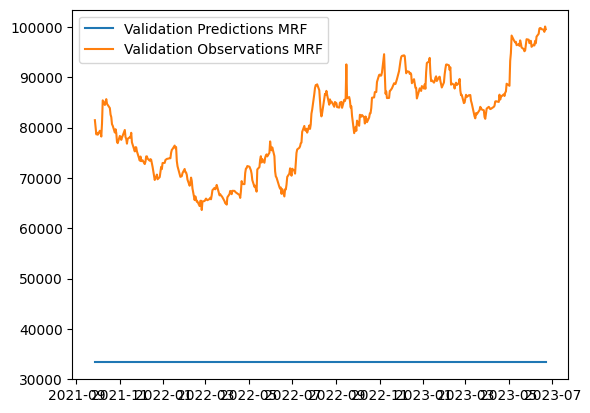

In [ ]:

# For MRF
ha13_val_predictions_MRF = ha13_model_MRF.predict(ha13_X_val_MRF).flatten()

plt.plot(ha13_dates_val_MRF, ha13_val_predictions_MRF)
plt.plot(ha13_dates_val_MRF, ha13_y_val_MRF)
plt.legend(['Validation Predictions MRF', 'Validation Observations MRF'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


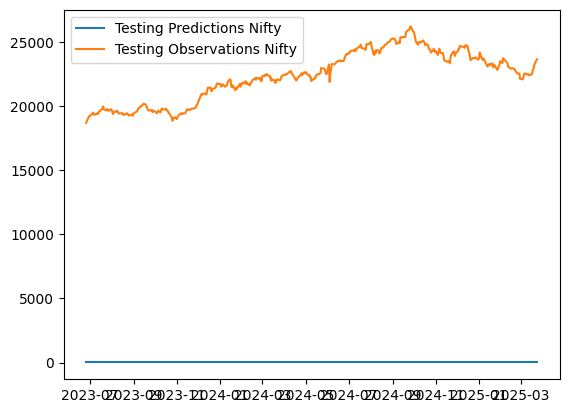

In [ ]:

# For Nifty
ha13_test_predictions_nifty = ha13_model_nifty.predict(ha13_X_test_nifty).flatten()

plt.plot(ha13_dates_test_nifty, ha13_test_predictions_nifty)
plt.plot(ha13_dates_test_nifty, ha13_y_test_nifty)
plt.legend(['Testing Predictions Nifty', 'Testing Observations Nifty'])


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


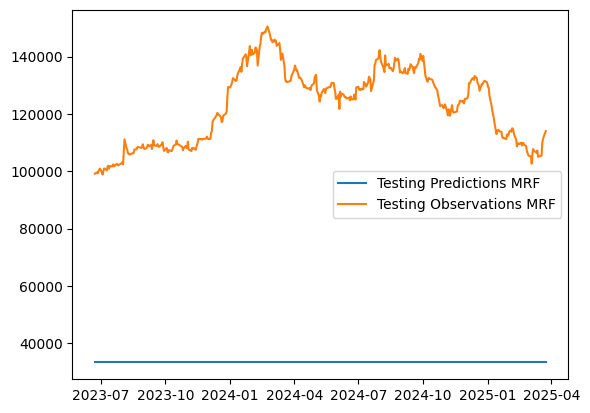

In [ ]:

# For MRF
ha13_test_predictions_MRF = ha13_model_MRF.predict(ha13_X_test_MRF).flatten()

plt.plot(ha13_dates_test_MRF, ha13_test_predictions_MRF)
plt.plot(ha13_dates_test_MRF, ha13_y_test_MRF)
plt.legend(['Testing Predictions MRF', 'Testing Observations MRF'])

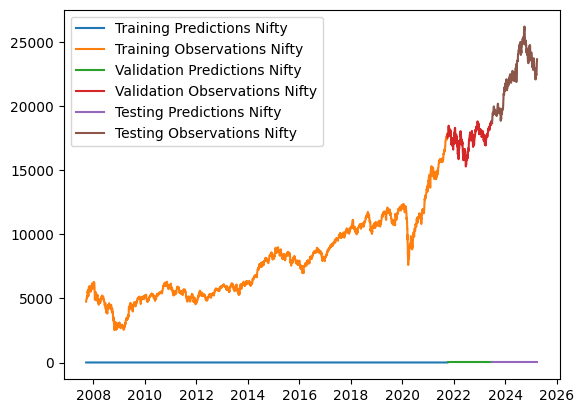

In [ ]:
# For Nifty
plt.plot(ha13_dates_train_nifty, ha13_train_predictions_nifty)
plt.plot(ha13_dates_train_nifty, ha13_y_train_nifty)
plt.plot(ha13_dates_val_nifty, ha13_val_predictions_nifty)
plt.plot(ha13_dates_val_nifty, ha13_y_val_nifty)
plt.plot(ha13_dates_test_nifty, ha13_test_predictions_nifty)
plt.plot(ha13_dates_test_nifty, ha13_y_test_nifty)
plt.legend(['Training Predictions Nifty',
            'Training Observations Nifty',
            'Validation Predictions Nifty',
            'Validation Observations Nifty',
            'Testing Predictions Nifty',
            'Testing Observations Nifty'])


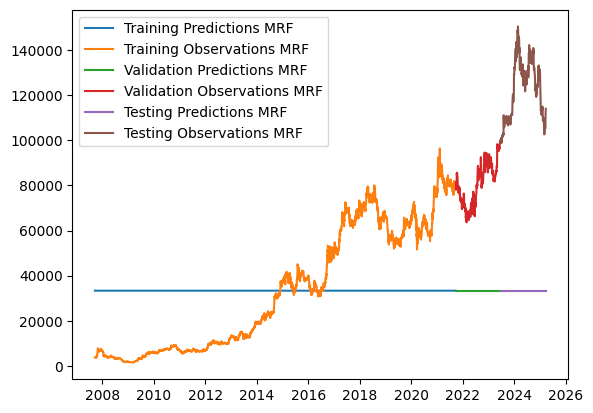

In [ ]:
# For MRF
plt.plot(ha13_dates_train_MRF, ha13_train_predictions_MRF)
plt.plot(ha13_dates_train_MRF, ha13_y_train_MRF)
plt.plot(ha13_dates_val_MRF, ha13_val_predictions_MRF)
plt.plot(ha13_dates_val_MRF, ha13_y_val_MRF)
plt.plot(ha13_dates_test_MRF, ha13_test_predictions_MRF)
plt.plot(ha13_dates_test_MRF, ha13_y_test_MRF)
plt.legend(['Training Predictions MRF',
            'Training Observations MRF',
            'Validation Predictions MRF',
            'Validation Observations MRF',
            'Testing Predictions MRF',
            'Testing Observations MRF'])


In [ ]:

# For Nifty
from copy import deepcopy

ha13_recursive_predictions_nifty = []
ha13_recursive_dates_nifty = np.concatenate([ha13_dates_val_nifty, ha13_dates_test_nifty])

for ha13_target_date in ha13_recursive_dates_nifty:
  ha13_last_window = deepcopy(ha13_X_train_nifty[-1])
  ha13_next_prediction = ha13_model_nifty.predict(np.array([ha13_last_window])).flatten()
  ha13_recursive_predictions_nifty.append(ha13_next_prediction)
  ha13_last_window[-1] = ha13_next_prediction

# For MRF
ha13_recursive_predictions_MRF = []
ha13_recursive_dates_MRF = np.concatenate([ha13_dates_val_MRF, ha13_dates_test_MRF])

for ha13_target_date in ha13_recursive_dates_MRF:
  ha13_last_window = deepcopy(ha13_X_train_MRF[-1])
  ha13_next_prediction = ha13_model_MRF.predict(np.array([ha13_last_window])).flatten()
  ha13_recursive_predictions_MRF.append(ha13_next_prediction)
  ha13_last_window[-1] = ha13_next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

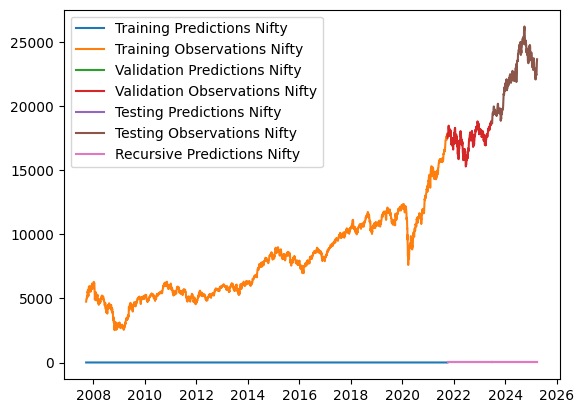

In [ ]:

# For Nifty
plt.plot(ha13_dates_train_nifty, ha13_train_predictions_nifty)
plt.plot(ha13_dates_train_nifty, ha13_y_train_nifty)
plt.plot(ha13_dates_val_nifty, ha13_val_predictions_nifty)
plt.plot(ha13_dates_val_nifty, ha13_y_val_nifty)
plt.plot(ha13_dates_test_nifty, ha13_test_predictions_nifty)
plt.plot(ha13_dates_test_nifty, ha13_y_test_nifty)
plt.plot(ha13_recursive_dates_nifty, ha13_recursive_predictions_nifty)
plt.legend(['Training Predictions Nifty',
            'Training Observations Nifty',
            'Validation Predictions Nifty',
            'Validation Observations Nifty',
            'Testing Predictions Nifty',
            'Testing Observations Nifty',
            'Recursive Predictions Nifty'])


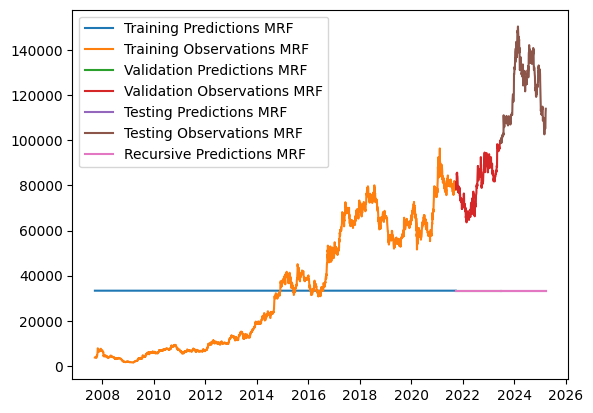

In [ ]:

# For MRF
plt.plot(ha13_dates_train_MRF, ha13_train_predictions_MRF)
plt.plot(ha13_dates_train_MRF, ha13_y_train_MRF)
plt.plot(ha13_dates_val_MRF, ha13_val_predictions_MRF)
plt.plot(ha13_dates_val_MRF, ha13_y_val_MRF)
plt.plot(ha13_dates_test_MRF, ha13_test_predictions_MRF)
plt.plot(ha13_dates_test_MRF, ha13_y_test_MRF)
plt.plot(ha13_recursive_dates_MRF, ha13_recursive_predictions_MRF)
plt.legend(['Training Predictions MRF',
            'Training Observations MRF',
            'Validation Predictions MRF',
            'Validation Observations MRF',
            'Testing Predictions MRF',
            'Testing Observations MRF',
            'Recursive Predictions MRF'])